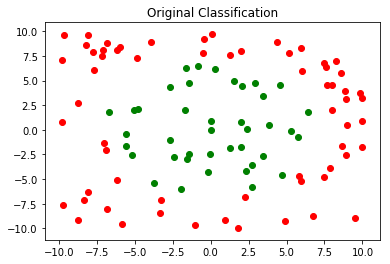

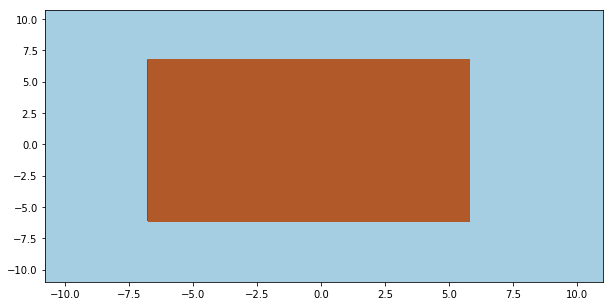

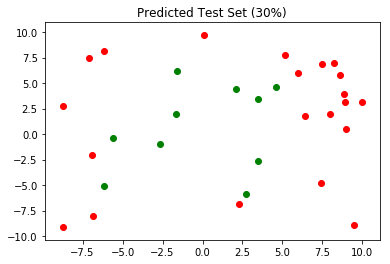

Accuracy: 0.9354838709677419


In [170]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import random
# from libsvm.svmutil import *
# from libsvm.grid import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split 

data= np.genfromtxt('dataCircle.txt')
pos=data[data[:,2] ==1]
neg=data[data[:,2] ==-1]

# separating predictors and response
x=data[:,0:2]
y=data[:,2]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
# print("y:",y_test)

# adaModel = AdaBoostClassifier(n_estimators=9, learning_rate=1)
adaModel=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm="SAMME.R", n_estimators=9)
model=adaModel.fit(x_train, y_train)
y_pred= model.predict(x_test)

def plot_decision_boundary(x,y):
    plot_colors="orange"
    plot_step=0.01
    class_names="AB"
    
    plt.figure(figsize=(10, 5))
    
    x_min, x_max=x[:,0].min() - 1, x[:,0].max() + 1
    y_min, y_max=x[:,1].min() - 1, x[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
   
    Z = adaModel.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis("tight")
    return x_min, x_max, y_min, y_max

plt.scatter(pos[:,0], pos[:,1], color='green', label='o')
plt.scatter(neg[:,0], neg[:,1], color='red', label='x')
plt.title('Original Classification')
x_min, x_max, y_min, y_max = plot_decision_boundary(x,y)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()



for idx,i in enumerate(y_pred):
    if y_pred[idx]==1:
        plt.scatter(x_test[idx,0],x_test[idx,1], color='green')
    else:
        plt.scatter(x_test[idx,0],x_test[idx,1], color='red')
plt.title('Predicted Test Set (30%)')   
plt.show()

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))